### 2022年度計算機演習A・B

# 第12回レポート課題の解説

### 演習1

$4$ 次バーンスタイン基底関数の $0\leq x\leq 1$ におけるグラフを描画してください。ただし、五つのグラフを一つの図に描画すること。

$n$ 次バーンスタイン基底関数の定義

$$
B_{i,n}(x)={}_n C_i x^i (1-x)^{n-i}, \quad i=0,\ldots,n
$$

より、$4$ 次バーンスタイン基底関数は

$$
B_{0,4}(x)=(1-x)^4, \quad B_{1,4}(x)=4x(1-x)^3, \quad B_{2,4}(x)=6x^2(1-x)^2, \quad B_{3,4}(x)=4x^3(1-x), \quad B_{4,4}(x)=x^4
$$

の五つである。

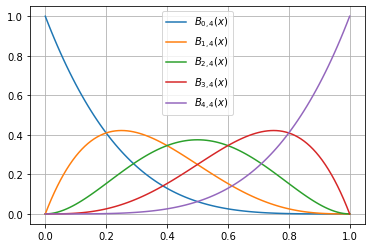

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,101)  #0から1まで101個の数からなる1次元配列

B = [(1-x)**4,4*x*(1-x)**3,6*x**2*(1-x)**2,4*x**3*(1-x),x**4]  #各バーンスタイン基底関数の値（1次元配列）からなるリスト

for i in range(5):  #i=0から4
    plt.plot(x,B[i],label="$B_{"+str(i)+",4}(x)$")  #グラフの描画

plt.grid()
plt.legend()
plt.show()

### 演習2

$4$ 次バーンスタイン多項式

$$
\sum_{i=0}^4 r_i B_{i,4}(x)
$$

を

$$
r_0=1,\quad r_1=1,\quad r_2=1,\quad r_3=1,\quad r_4=1
$$

と

$$
r_0=0,\quad r_1=\frac{1}{4},\quad r_2=\frac{1}{2},\quad r_3=\frac{3}{4},\quad r_4=1
$$

に対してそれぞれ考えるとき、$0\leq x\leq 1$ におけるグラフを描画してください。ただし、二つのグラフを一つの図に描画すること。

さらに、一つ目のグラフについて、得られた結果の理由を考察してください。

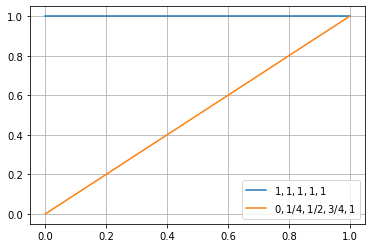

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,101)
B = [(1-x)**4,4*x*(1-x)**3,6*x**2*(1-x)**2,4*x**3*(1-x),x**4]

r = [1,1,1,1,1]  #バーンスタイン多項式の係数のリスト
y = 0
for i in range(5):
    y = y+r[i]*B[i]

plt.plot(x,y,label="$1,1,1,1,1$")

r = [0,1/4,1/2,3/4,1]  #バーンスタイン多項式の係数のリスト
y = 0
for i in range(5):
    y = y+r[i]*B[i]

plt.plot(x,y,label="$0,1/4,1/2,3/4,1$")

plt.grid()
plt.legend()
plt.show()

### （考察）

一つ目に考えている $4$ 次バーンスタイン多項式は

$$
B_{0,4}(x)+B_{1,4}(x)+B_{2,4}(x)+B_{3,4}(x)+B_{4,4}(x)
$$

であり、描画したグラフではこれは定数関数 $1$ と等しいという結果になった。

実際、一般の $n$ について、二項定理より

$$
1=(x+(1-x))^n=\sum_{i=0}^n{}_n C_i x^i (1-x)^{n-i}=\sum_{i=0}^nB_{i,n}(x)
$$

であるから、全ての係数が $1$ であるような $n$ 次バーンスタイン多項式は定数関数 $1$ と等しくなることが分かる。

### 演習3（オプション）

$n$ 次バーンスタイン基底関数の値を返す関数`Bernstein(i,n,x)`を定義した上で、関数

$$
f(x)=\sin (2\pi x)\quad (0\leq x\leq 1)
$$

を $20$ 次バーンスタイン多項式によって近似し、元の関数と得られた多項式の $0\leq x\leq 1$ におけるグラフを描画してください。ただし、二つのグラフを一つの図に描画すること。

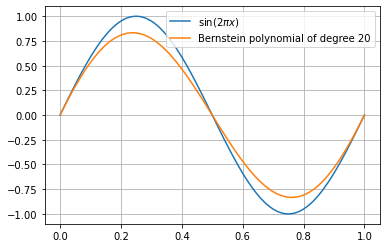

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math  #階乗を計算する関数factorialを使用するために必要

def Bernstein(i,n,x):  #i番目のn次バーンスタイン基底関数のxにおける値を返す関数
    return math.factorial(n)/(math.factorial(i)*math.factorial(n-i))*x**i*(1-x)**(n-i)

def f(x):  #対象の数学関数もPythonの関数として定義しておく
    return np.sin(2*np.pi*x)

n = 20  #変数を使えば、後で次数を容易に変更できる

x = np.linspace(0,1,101)

plt.plot(x,f(x),label="$\sin(2\pi x)$")  #対象の数学関数のグラフの描画

y = 0
for i in range(n+1):
    y = y+f(i/n)*Bernstein(i,n,x)  #近似に用いるバーンスタイン多項式の計算

plt.plot(x,y,label="Bernstein polynomial of degree "+str(n))  #バーンスタイン多項式のグラフの描画

plt.grid()
plt.legend()
plt.show()